In [0]:
!pip install tf-nightly

In [0]:
!pip install memory_profiler
%load_ext memory_profiler

In [0]:
import gc
import inspect
import time

import matplotlib
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
keras = tf.keras

print(tf.__version__)
tf.enable_v2_behavior()

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 30]

1.14.1-dev20190606


In [0]:
TEMPLATE = """
import time
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

keras = tf.keras
print(tf.__version__)

{}

run()
"""

def write_file(fn):
  fn_source = inspect.getsource(fn).splitlines()
  fn_source[0] = "def run():"
  fn_source = "\n".join(fn_source)
  with open("test.py", "wt") as f:
    f.write(TEMPLATE.format(fn_source))

mprof: Sampling memory every 0.1s
1.14.1-dev20190606
Using last profile data.


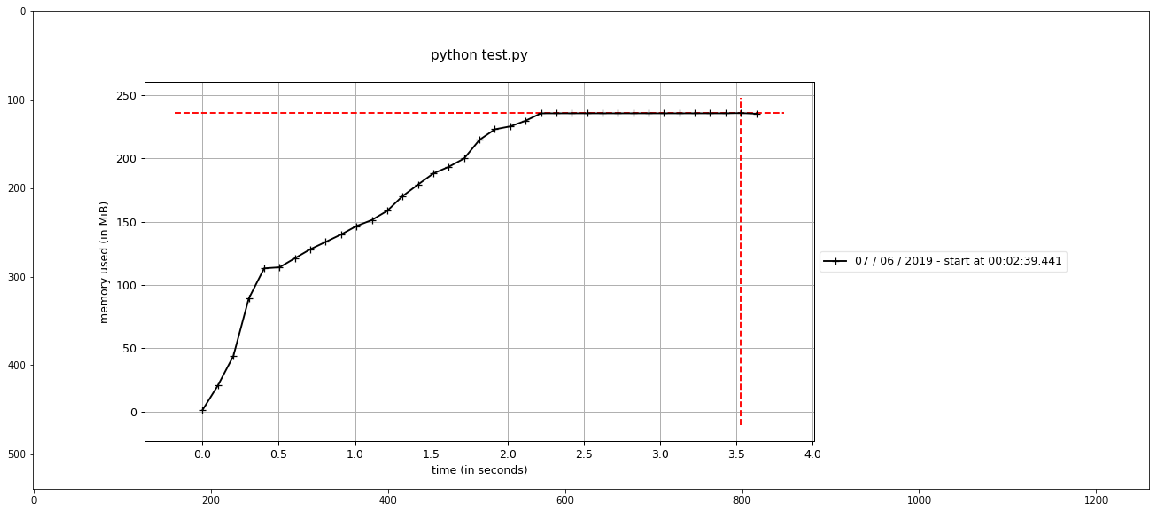

In [0]:
def run_baseline():
  for _ in range(100):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(120, activation='relu'))
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.SGD())
    time.sleep(0.01)
    
fn = run_baseline

# Generic glue (repeated because of the `!` commands)
write_file(fn)
! mprof run --include-children python test.py
! rm mem_use.png
! mprof plot -o mem_use.png
plt.imshow(plt.imread("mem_use.png"))

mprof: Sampling memory every 0.1s
1.14.1-dev20190606
2019-06-07 00:02:50.695274: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-06-07 00:02:50.700023: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-07 00:02:50.700271: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x18df480 executing computations on platform Host. Devices:
2019-06-07 00:02:50.700305: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
Using last profile data.


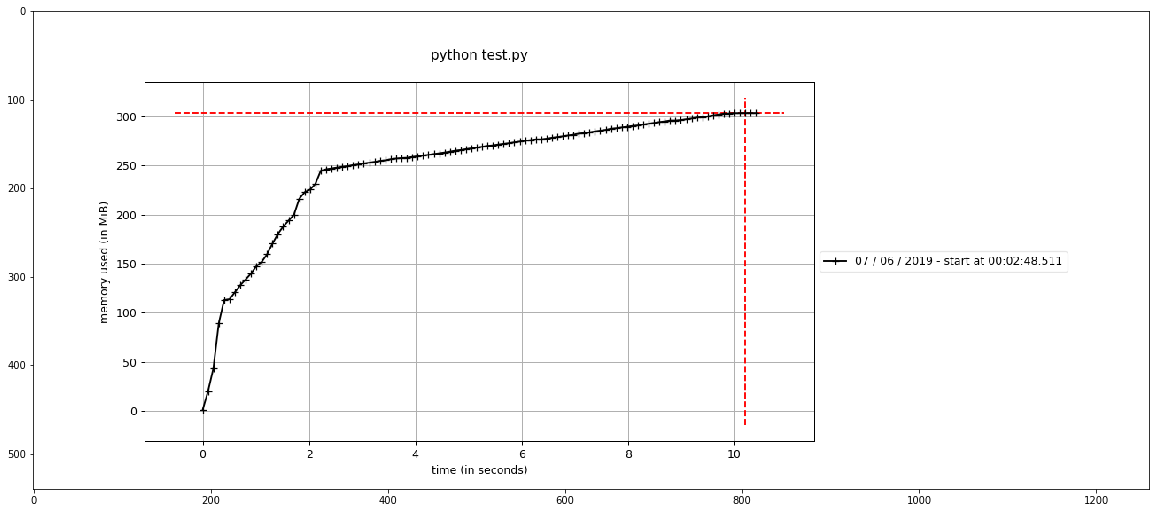

In [0]:
def run_with_shape():
  for _ in range(100):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(120, activation='relu', input_shape=(10, 10)))
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.SGD())
    time.sleep(0.01)
    
fn = run_with_shape

# Generic glue (repeated because of the `!` commands)
write_file(fn)
! mprof run --include-children python test.py
! rm mem_use.png
! mprof plot -o mem_use.png
plt.imshow(plt.imread("mem_use.png"))

mprof: Sampling memory every 0.1s
1.14.1-dev20190606
2019-06-07 00:03:06.399316: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-06-07 00:03:06.404042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-07 00:03:06.404280: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2117480 executing computations on platform Host. Devices:
2019-06-07 00:03:06.404315: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
Using last profile data.


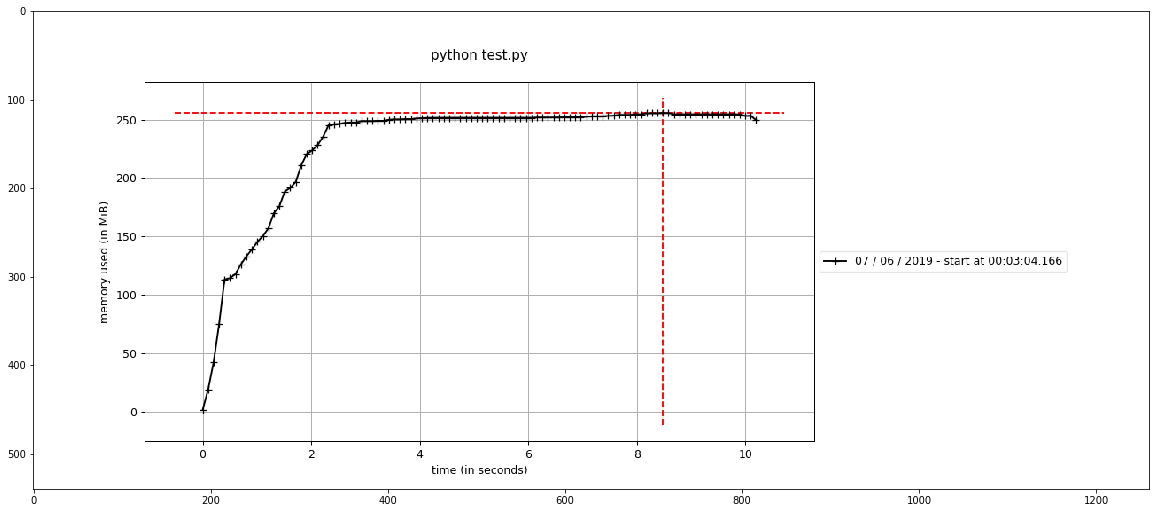

In [0]:
def run_with_shape_and_clear():
  for _ in range(100):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(120, activation='relu', input_shape=(10, 10)))
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.SGD())
    keras.backend.clear_session()
    time.sleep(0.01)
    
fn = run_with_shape_and_clear

# Generic glue (repeated because of the `!` commands)
write_file(fn)
! mprof run --include-children python test.py
! rm mem_use.png
! mprof plot -o mem_use.png
plt.imshow(plt.imread("mem_use.png"))